In [2]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
import pickle as pkl
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


In [3]:
db = CaseDB()

# choice = "c1a-40eV_1e17_newbout"
# choice = "c4a-1.862e6"
choice = "d1a-2.892e6_crash"
# choice = "b1et2_3.08re6_fr0.85"
# choice = "b3a-t3-small_temp_steps"

# case, caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"],
                    # double_load = True)

caseng = Load.case_2D(db.casepaths[choice], gridfilepath = db.gridpaths["g3a5-fatter.nc"], double_load = False, keep_boundaries = False)

--> dx, dy and J will not be unnormalised
CHECK: Total domain volume is 1.556E+00 [m3]


In [5]:
%matplotlib qt

In [4]:
pkl_path = r"C:\Users\mikek\OneDrive\Project\collab\From\Matteo\initial_solps_cases_2022-12-06\20221206_HERMES_SOLEDGE\HERMES_SOLEDGE.S33600_Tamb_case.SEE=0.BGK=OFF.SOLEDGE.reactions.input.dat.OK\last10s.pkl"

In [5]:
caseng.ds.isel(t=-1)["Ne"].bout.pcolormesh(cmap = "Spectral_r", vmin = 1e14, vmax = 1e20, logscale = True)

In [15]:
def _create_norm(logscale, norm, vmin, vmax):
    if logscale:
        if norm is not None:
            raise ValueError(
                "norm and logscale cannot both be passed at the same time."
            )
        if vmin * vmax > 0:
            # vmin and vmax have the same sign, so can use standard log-scale
            norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
        else:
            # vmin and vmax have opposite signs, so use symmetrical logarithmic scale
            if not isinstance(logscale, bool):
                linear_scale = logscale
            else:
                linear_scale = 1.0e-5
            linear_threshold = min(abs(vmin), abs(vmax)) * linear_scale
            norm = mpl.colors.SymLogNorm(linear_threshold, vmin=vmin, vmax=vmax)
    elif norm is None:
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    return norm

norm = _create_norm(True, None, 1e14, 1e20)
fig, ax = plt.subplots(figsize=(9,9))
# ax.set_xlim(0.6,0.8)
# ax.set_ylim(-0.1, 0.1)
anim = xbout.plotting.animate.animate_poloidal(caseng.ds["Ne"], ax = ax, cmap = "Spectral_r", norm = norm)

In [6]:
self = caseng

fig, axes = plt.subplots(figsize = (8,5), dpi = 100)
lw = 0
anim = xbout.plotting.animate.animate_poloidal(abs(self.ds["Ne"]), ax = axes, cmap = "Spectral_r", vmin = 1e14, vmax = 1e20, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(self.ds["Pd+"], ax = axes, cmap = "Spectral_r", vmin = None, vmax = None, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(self.ds["Pe"], ax = axes, cmap = "Spectral_r", vmin = None, vmax = None, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(self.ds["Td+"], ax = axes, cmap = "Spectral_r", vmin = 1, vmax = 100, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(self.ds["Te"], ax = axes, cmap = "Spectral_r", vmin = 1, vmax = 100, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(self.ds["NVd+"].sel(t=slice(0,1e5)), ax = axes, cmap = "Spectral_r", vmin = None, vmax = None, logscale = True, color = "k", linewidth = lw)
# anim = xbout.plotting.animate.animate_poloidal(abs(self.ds["NVd+"]), ax = axes, cmap = "Spectral_r", vmin = 0, vmax = 1e-9, logscale = False, color = "k", linewidth = lw)

# for ax in axes:
#     ax.set_ylim(0.5,0.9)
#     ax.set_xlim(0.2,0.65)


# axes.set_ylim(-0.9,-0.65) # Lower PFR
# axes.set_ylim(0.65, 0.9) # Upper PFR
# axes.set_xlim(0.23,0.56)

In [83]:
fig, ax = plt.subplots(figsize = (8,5), dpi = 100)

data["Te"].isel(t=-1).bout.pcolormesh(ax = ax, cmap = "Spectral_r", logscale = True, vmin = 0.01, vmax = 5 )
ax.set_ylim(0.65, 0.9) # Upper PFR
ax.set_xlim(0.23,0.56)

(0.23, 0.56)

In [74]:
data = self.ds

cols = 1
fig, axes = plt.subplots(1,cols, figsize = (cols*4,5), dpi = 100)
fig.subplots_adjust(wspace = 0)

data["Td+"].isel(t=-1).bout.pcolormesh(ax = axes[0], cmap = "Spectral_r", logscale = True,
vmin = 0.01, vmax = 10, 
)
(data["Te"].isel(t=-1)).bout.pcolormesh(ax = axes[1], cmap = "Spectral_r", logscale = False, 
vmin = 0.01, vmax = 100, 
)
# data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "Spectral_r", logscale = True,
# vmin = 1e10, 
# # vmax = 1e15, 
# )
# data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "Spectral_r", logscale = True,
# vmin = 1e10, 
# # vmax = 1e15, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]

for ax in axes:
    ax.set_ylim(0.65, 0.9) # Upper PFR
    ax.set_xlim(0.23,0.56)

TypeError: 'AxesSubplot' object is not subscriptable

In [94]:
self.ds["Ph+"].attrs["long_name"]

'Ion pressure (h+)'

In [41]:
%matplotlib widget

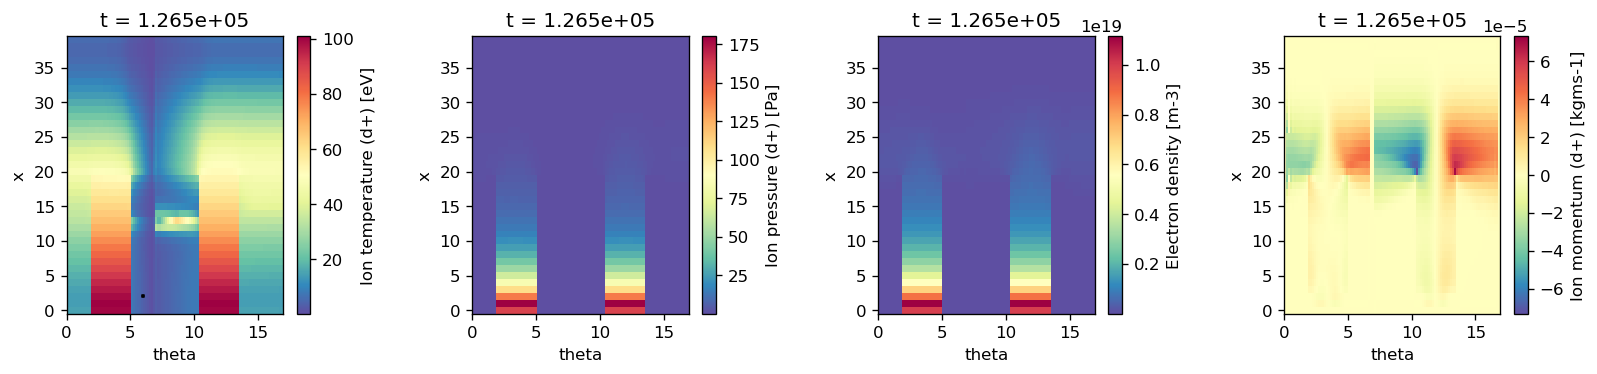

In [83]:
self = case
data = case.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*4,3), dpi = 120)
fig.subplots_adjust(wspace = 0.5)
# fig.tight_layout(pad = 1)
time = self.ds["t"][-1]

data["Td+"].sel(t=time).plot(ax = axes[0], cmap = "Spectral_r",
# vmin = 53, vmax = 1600, 
)
(data["Pd+"].sel(t=time)).plot(ax = axes[1], cmap = "Spectral_r", 
)
data["Ne"].sel(t=time).plot(ax = axes[2], cmap = "Spectral_r",
# vmin = 1.1e15, vmax = 7.2e19, 
)
data["NVd+"].sel(t=time).plot(ax = axes[3], cmap = "Spectral_r", 
# vmin = 9.7e13, vmax = 2.9e19, 
)
# [ax.set_ylim(-0.9,0) for ax in axes]
# axes[0].hlines(2, 0, 15, colors = "r")
axes[0].scatter(6, 2, c = "k", marker = "s", s = 3)
print("")

In [45]:
%matplotlib inline

In [60]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

theta_id = find_nearest(data["theta"], 5)
theta_id

31

[None, None, None, None]

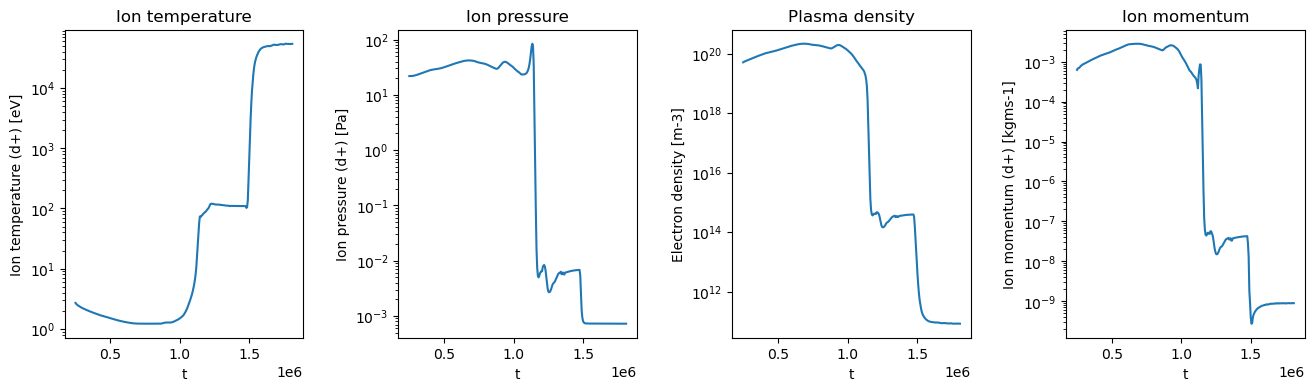

In [65]:
fig, axes = plt.subplots(1,4, figsize = (16,4))
fig.subplots_adjust(wspace=0.4)
toplot = data.isel(x = 2, theta = 33)

ax = axes[0]
toplot["Td+"].plot(ax = ax)
ax.set_title("Ion temperature")

ax = axes[1]
toplot["Pd+"].plot(ax = ax)
ax.set_title("Ion pressure")

ax = axes[2]
toplot["Ne"].plot(ax = ax)
ax.set_title("Plasma density")

ax = axes[3]
toplot["NVd+"].plot(ax = ax)
ax.set_title("Ion momentum")

[ax.set_yscale("log") for ax in axes]



In [80]:
toplot = case.ds.isel(x = case.slices("core_edge")[0], theta = case.slices("core_edge")[1]).sum("theta")
# toplot.coords
toplot["Te"].plot()

TypeError: unsupported operand type(s) for +: 'slice' and 'int'

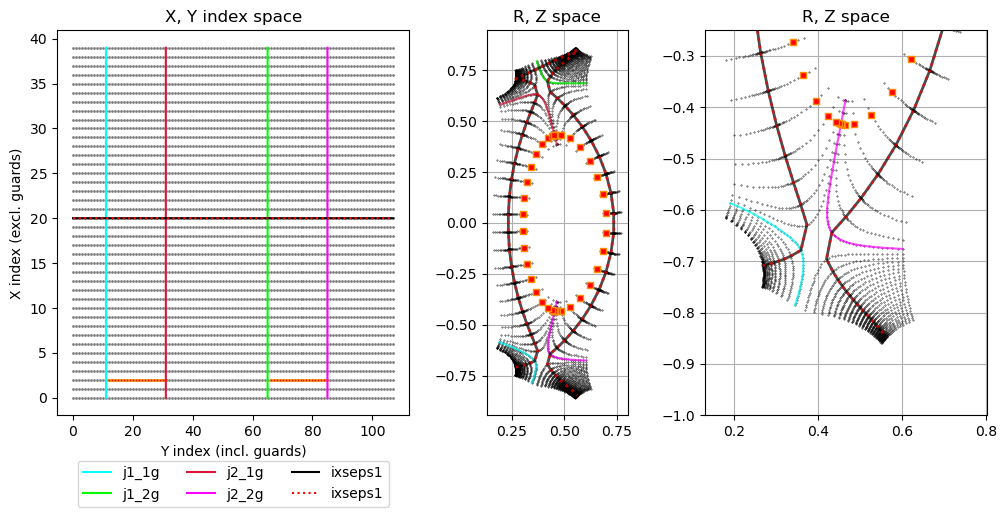

In [69]:
case.plot_slice(case.slices("core_edge"))

In [6]:
self = case

fig, ax = plt.subplots(figsize = (8,6))
ax.set_xlim(0.25, 0.7)
ax.set_ylim(0, 0.9)
xbout.plotting.animate.animate_poloidal(self.ds["Td+"], 
cmap = "jet", 
vmin = 100, vmax = 10000,
ax = ax
)
# cmap = "gist_ncar",
# cmap = "nipy_spectral",
# cmap = "jet",
# cmap = "rainbow",

# logscale = True


# xbout.plotting.animate.animate_poloidal(self.ds["NVh+"], 
# # cmap = "Spectral", 
# # cmap = "gist_ncar",
# # cmap = "nipy_spectral",
# cmap = "jet",
# # vmin = 0.01, vmax = 2,
# # vmin = 1e16, vmax = 1e19,
# logscale = True
# )

In [151]:
a5.ds.metadata

{'BOUT_VERSION': 5.0,
 'iteration': 320,
 'zperiod': 1,
 'MXSUB': 14,
 'MYSUB': 8,
 'MZSUB': 1,
 'MXG': 2,
 'MYG': 2,
 'MZG': 0,
 'nx': 32,
 'ny': 96,
 'nz': 1,
 'MZ': 1,
 'NXPE': 2,
 'NYPE': 12,
 'NZPE': 1,
 'ZMAX': 1.0,
 'ZMIN': 0.0,
 'ixseps1': 16,
 'ixseps2': 16,
 'jyseps1_1': 7,
 'jyseps1_2': 47,
 'jyseps2_1': 31,
 'jyseps2_2': 87,
 'ny_inner': 40,
 'grid_id': 'd2fddbe1-5941-11ed-ad5a-4c034f4e9309',
 'hypnotoad_version': '0.4.4+4.g85a7f4a',
 'hypnotoad_git_hash': '85a7f4a882072427a55e2afa14c3f6e05db44e7c',
 'hypnotoad_git_diff': '',
 'hypnotoad_geqdsk_filename': 'C:/Users/mikek/OneDrive/Project/collab/tech/grid/ST40/first-test/ST40_P3_eq_0015-ogr_geom.geqdsk',
 'has_fftw': 1,
 'has_gettext': 1,
 'has_lapack': 1,
 'has_netcdf': 1,
 'has_legacy_netcdf': 0,
 'has_petsc': 1,
 'has_pretty_function': 1,
 'has_pvode': 1,
 'has_scorep': 0,
 'has_slepc': 0,
 'has_sundials': 1,
 'use_backtrace': 1,
 'use_color': 1,
 'use_openmp': 0,
 'use_output_debug': 0,
 'use_sigfpe': 0,
 'use_signal': 1